## Árboles de decisión con Scikit-Learn

Vamos a trabajar con un dataset que es muy conocido, el iris dataset. Acá pueden encontrar más información al respecto:

https://en.wikipedia.org/wiki/Iris_flower_data_set

Se puede importar desde seaborn

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set()

In [2]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![](iris.png)

Y visualizamos de una manera conveniente. ¡Este gráfico es un clásico!

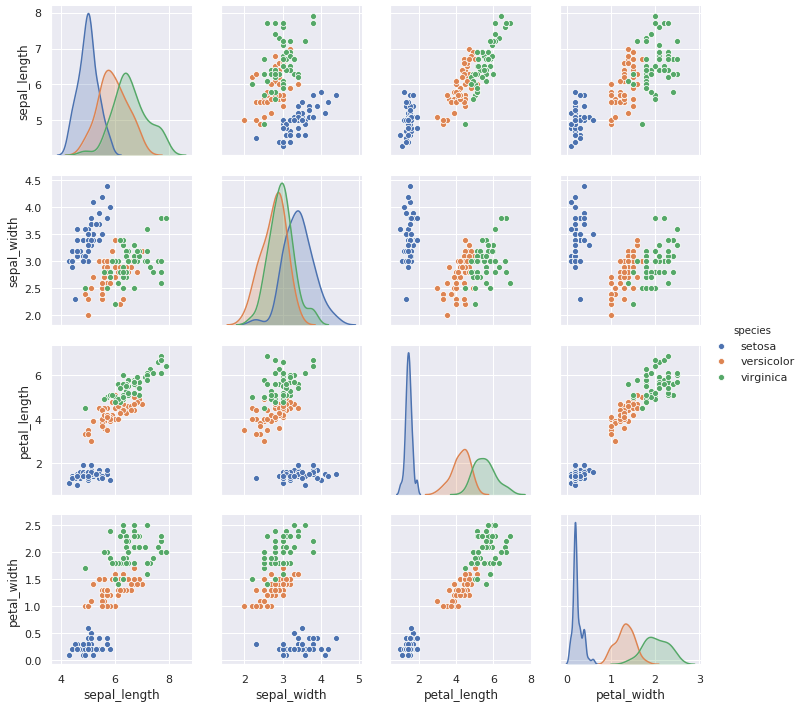

In [3]:
sns.pairplot(iris, hue="species")
plt.show()

**Para pensar**: ¿Son separables las especies?¿Cuáles serán más fáciles de separar?¿Con qué atributos?

### DecisionTreeClassifier

Vamos a entrenar un árbol de decisión usando Scikit-Learn. Para ello:


**Ejercicio 1**: importar un DecisionTreeClassifier de Scikit-Learn. ¿Cuáles son sus parámetros? En particular, investigar "criterion" y "max_depth".

In [4]:
from sklearn.tree import DecisionTreeClassifier

**Ejercicio 2**: crear un DecisionTreeClassifier con max_depth = 2.

In [5]:
clf = DecisionTreeClassifier(max_depth = 2)

**Ejercicio 3**: separar del dataframes iris los features y las etiquetas. Llamar "X" a los features e "y" a las etiquetas

In [6]:
X = iris.drop("species", axis=1)
y = iris.species

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

**Ejercicio 4**: entrenar el DecisionTreeClassifier que crearon con los datos "X" y las etiquetas "y"

In [9]:
### PISTA: FIT
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Ejercicio 5**: explorar algunas características del modelo entrenado.

In [10]:
# print(clf.classes_)
# print(clf.n_classes_)
# print(clf.max_features_)
# print(clf.feature_importances_)

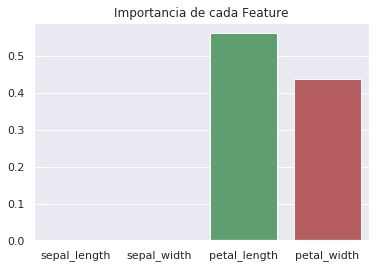

In [11]:
importances = clf.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

**Ejercicio 6**: predecir con el modelo las etiquetas de todas las instancias.

In [12]:
### PISTA: predict
y_pred = clf.predict(X)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

Imprimimos etiquetas predichas y valores reales.

In [13]:
fila = 100
print('La prediccion es', y_pred[fila],'. La etiqueta verdadera es', y[fila])

La prediccion es virginica . La etiqueta verdadera es virginica


**Ejercicio 7**: ¿Cuán bien predijo?¿Cómo lo evaluarían? Usar, de scikit-learn, accuracy_score para evaluar la performance del modelo.

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.96

**Ejercicio 8**: ¿Qué ocurre con el desempeño a medida que aumentamos max_depth? Volver a correr todas las celdas, pero inicializando el DecisionTreeClassifier con valores más altos de max_depth.

**Para pensar**: ¿hay algo que les haga ruido de la metodología empleada hasta ahora?¿Qué ocurre si hacemos max_depth suficientemente grande?

### Extra: fronteras de decisión

Vamos a graficar las fronteras de decisión que aprende el algoritmo. Para ello, entrenamos un clasificador, pero solamente con dos atributos, petal_width y petal_lenght.

No se preocupen por entender código a continuación

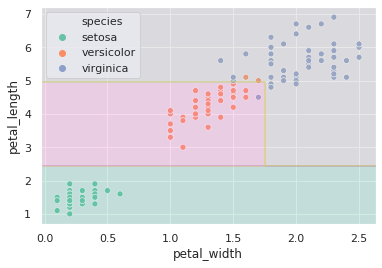

In [15]:
import numpy as np

## Creamos el clasificador
clf = DecisionTreeClassifier(max_depth = 3)

# # Modificamos un poco los datos para poder graficar
y_train = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})

# Entrenamos
clf.fit(X[['petal_width', 'petal_length']], y_train)

# Graficamos los datos y las fronteras creadas
plt.figure()
ax = sns.scatterplot(X.petal_width, X.petal_length, hue=y, palette='Set2')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

**Para probar**:¿Cómo se modifican las fronteras a medida que cambian el max_depth?

### Estrategias para elegir los mejores hiperparámetros


El hiperparámetro más importantes de los árboles binarios de clasificación es la profundidad. ¿Cuál se imaginan que es el problema de elegir una profunidad máxima infinita (Es decir, None)? ¿Y de elegir profundidad máxima cero? 

Queremos ver qué cambia en las fronteras de decisión a medida que aumento la profundidad del árbol. Para ello,

**1.** Entrenar un árbol de decisión con profundidad máxima uno y graficar su frontera de decisión. Luego, ir variando en uno la profundidad máxima del árbol para poder determinar qué pasa con esas fronteras.

**2.** ¿Qué pasa con las fronteras de decisión en el caso de profundidad infinita?

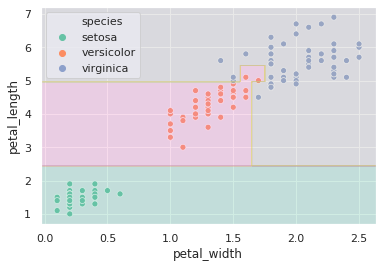

In [17]:
max_depth = 100
clf = DecisionTreeClassifier(max_depth = max_depth,random_state=0)
y_train = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})
clf.fit(X[['petal_width', 'petal_length']], y_train)
plt.figure()
ax = sns.scatterplot(X.petal_width, X.petal_length, hue=y, palette='Set2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

**2.** Verificá tu hipótesis graficando árboles de distinta profundidad. ¿Qué pasa si graficás un árbol de profundidad infinita?

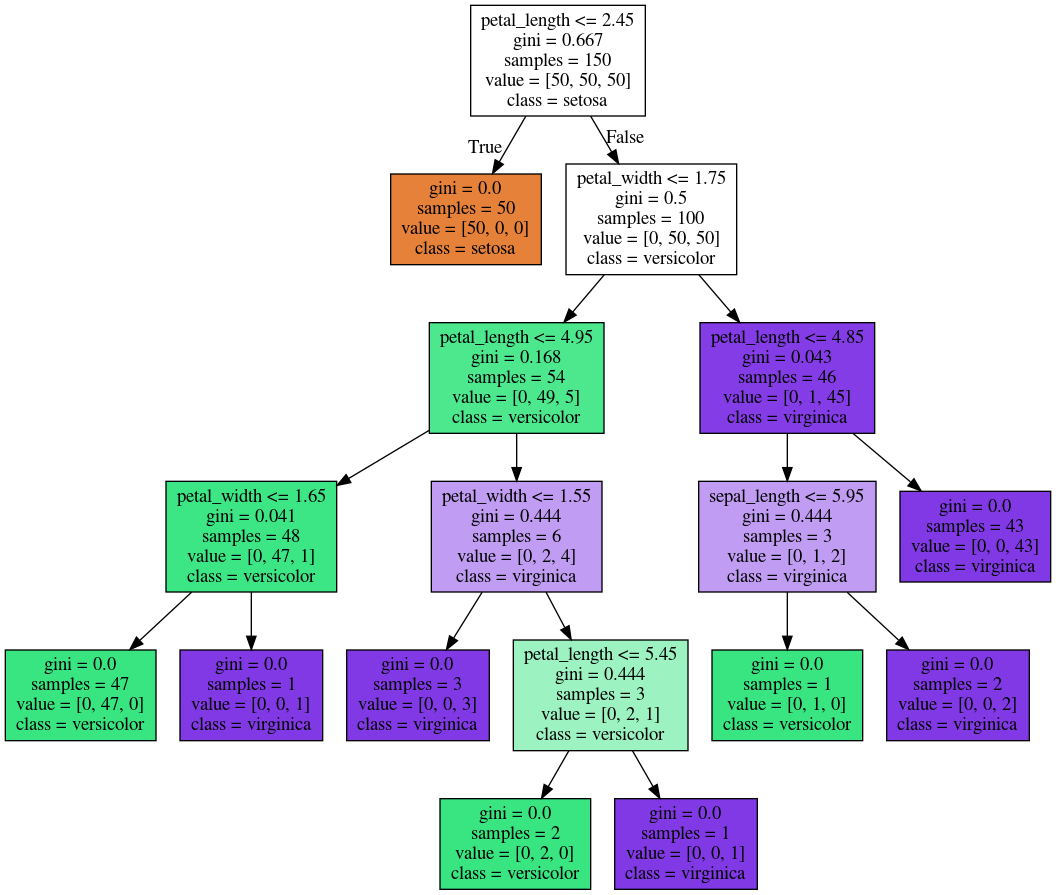

In [18]:
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz 


max_depth = None
clf = DecisionTreeClassifier(max_depth = max_depth)

clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None,class_names=clf.classes_,feature_names=X.columns,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

**3.** ¿Qué pasa con el *score* del modelo a medida que aumentamos la profundidad del árbol? ¿Pensás que refleja la *performance* real del modelo?

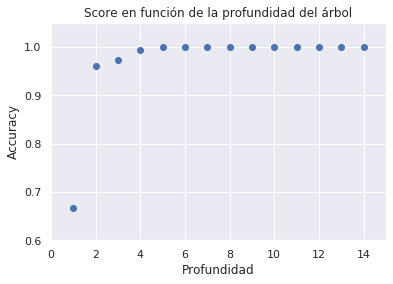

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

accuracy = []
for max_depth in range(1,15):
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X, y)
    y_pred=clf.predict(X)
    accuracy.append(accuracy_score(y,y_pred,normalize=True))
    
    
plt.plot(range(1,15), accuracy,'o')
plt.title("Score en función de la profundidad del árbol")
plt.xlim([0,15]);plt.xlabel('Profundidad')
plt.ylim([0.6,1.05]);plt.ylabel('Accuracy')
plt.show()

**PARA PENSAR**: ¿Qué alternativas se te ocurren para tener una evaluación más realista del modelo?

### Datos de validación

La idea es separar los datos disponibles en un conjunto de "entrenamiento", que utilizaremos para entrenar el modelo de ML, y otro de "validación"(o "test") que utilizaremos para testearlo.

In [ ]:
# Descomentar las siguientes lineas y completar las funciones correspondientes. Vas a tener que googlear.
# Te recomendamos utilizar un 30% de los datos para validar el modelo. 

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(###Completar)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.334)

In [24]:
# Entrená el modelo con los datos de entrenamiento
tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
# Calculá el accuracy con los datos de validación.
y_pred=tree.predict(X_train)
accuracy_score(y_train,y_pred,normalize=True)


0.6868686868686869

In [26]:
# Investigá qué pasa si corrés nuevamente todas las lineas desde la subsección "datos de validación". ¿Qué concluís?

Ahora, vamos a investigar cómo se comporta el score del modelo sobre los datos de entrenamiento y sobre los datos de validación a medida que aumentamos la profundidad máxima del árbol (de 0 a 15). Para eso, sólamente tenés que correr las próximas lineas. 

¿Qué interpretación le das a cada una de las curvas?

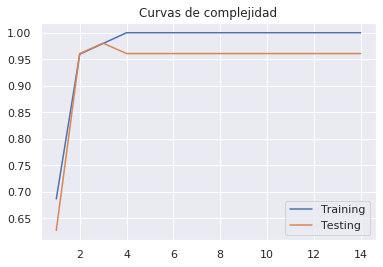

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 

accuracy = []
accuracy_test = []
for max_depth in range(1,15):
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_train)
    accuracy.append(accuracy_score(y_train,y_pred,normalize=True))
    
    y_test_pred = clf.predict(X_test)
    accuracy_test.append(accuracy_score(y_test,y_test_pred,normalize=True))

    
plt.plot(range(1,15), accuracy, label='Training')
plt.plot(range(1,15), accuracy_test, label='Testing')
plt.legend(loc="best")
plt.title("Curvas de complejidad")
plt.show()